In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


In [4]:
import os
os.getcwd()

'c:\\Users\\dobimuyiwa\\Documents\\Exercise Files\\LinkedIn Learning'

In [5]:
loans = pd.read_csv(r'c:\\Users\\dobimuyiwa\\Documents\\Exercise Files\\LinkedIn Learning\\loans.csv')

In [6]:
loans.head()

,REF_DATE,GEO,DGUID,Level of study,Field of study,Sex,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2015,Canada,2016A000011124,All levels of study,All fields of study,Both sexes,Number of graduates,Number,223,units,0,v1234088983,1.1.1.1.1,94630.0,A,NaN,NaN,0
1,2015,Canada,2016A000011124,All levels of study,All fields of study,Both sexes,Average debt owed at graduation,Dollars,81,units,0,v1234088984,1.1.1.1.2,19500.0,A,NaN,NaN,0
2,2015,Canada,2016A000011124,All levels of study,All fields of study,Both sexes,Median debt owed at graduation,Dollars,81,units,0,v1234088985,1.1.1.1.3,15000.0,A,NaN,NaN,0
3,2015,Canada,2016A000011124,All levels of study,All fields of study,Both sexes,Percentage of graduates with large debt at gra...,Percent,239,units,0,v1234088986,1.1.1.1.4,23.0,NaN,NaN,NaN,0
4,2015,Canada,2016A000011124,All levels of study,All fields of study,Both sexes,Average debt owed at time of interview,Dollars,81,units,0,v1234088987,1.1.1.1.5,10700.0,A,NaN,NaN,0


In [7]:
#Data cleaning

loan = loans.drop(columns=['DGUID', 'Statistics', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
                            'SYMBOL', 'TERMINATED', 'DECIMALS'])

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47520 entries, 0 to 47519
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   REF_DATE        47520 non-null  int64 
 1   GEO             47520 non-null  object
 2   Level of study  47520 non-null  object
 3   Field of study  47520 non-null  object
 4   Sex             47520 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [9]:
#To see the summary stat of the data
loan.head()

,REF_DATE,GEO,Level of study,Field of study,Sex
0,2015,Canada,All levels of study,All fields of study,Both sexes
1,2015,Canada,All levels of study,All fields of study,Both sexes
2,2015,Canada,All levels of study,All fields of study,Both sexes
3,2015,Canada,All levels of study,All fields of study,Both sexes
4,2015,Canada,All levels of study,All fields of study,Both sexes


In [10]:
loan.tail()

,REF_DATE,GEO,Level of study,Field of study,Sex
47515,2015,British Columbia,Doctorate,All fields of study - BHASE [b],Females
47516,2015,British Columbia,Doctorate,All fields of study - BHASE [b],Females
47517,2015,British Columbia,Doctorate,All fields of study - BHASE [b],Females
47518,2015,British Columbia,Doctorate,All fields of study - BHASE [b],Females
47519,2015,British Columbia,Doctorate,All fields of study - BHASE [b],Females


In [11]:
loan = loan.rename(columns={'Level of study':'Level_of_study', 'Field of study':'Field_of_study'})
loan.head()

,REF_DATE,GEO,Level_of_study,Field_of_study,Sex
0,2015,Canada,All levels of study,All fields of study,Both sexes
1,2015,Canada,All levels of study,All fields of study,Both sexes
2,2015,Canada,All levels of study,All fields of study,Both sexes
3,2015,Canada,All levels of study,All fields of study,Both sexes
4,2015,Canada,All levels of study,All fields of study,Both sexes


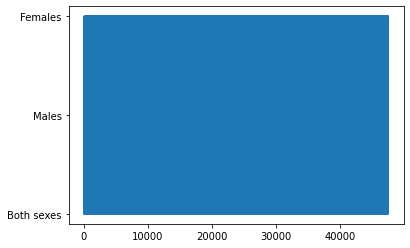

In [12]:
sex = loan['Sex']
plt.plot(sex)

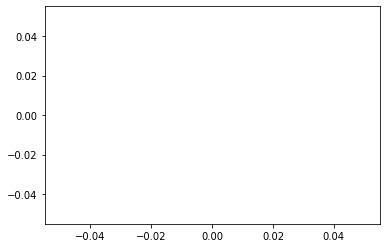

In [17]:
gender = {'Males': 1, 'Females': 0, 'Both sexes': 2}
loan['Sex'] = loan['Sex'].map(gender)

level = {'All levels of study': 0, 'College': 1, 'Bachelor\'s': 2, 'Master\'s': 3, 'Doctorate': 4, 'Professional': 5 }
loan['Level_of_study'] = loan['Level_of_study'].map(level)

plot = loan[['Level_of_study', 'Sex']]
plt.plot(plot)

<Figure size 432x288 with 0 Axes>

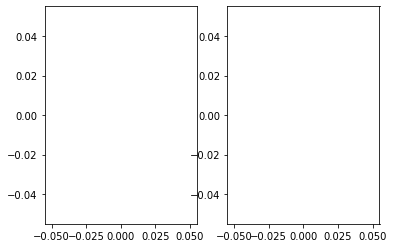

In [24]:
fig = plt.figure()
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(loan['Sex'])
ax2.plot(loan['Level_of_study'])
plt.show()

<AxesSubplot:>

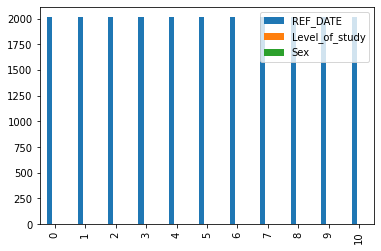

In [20]:
loan.loc[0:10].plot(kind='bar')

In [11]:
gender = {'Males': 1, 'Females': 0, 'Both sexes': 2}

loan['Sex'] = loan['Sex'].map(gender)

In [19]:
loan.head()
print(type(loan))

<class 'pandas.core.frame.DataFrame'>


In [13]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47520 entries, 0 to 47519
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   REF_DATE        47520 non-null  int64 
 1   GEO             47520 non-null  object
 2   Level_of_study  47520 non-null  object
 3   Field_of_study  47520 non-null  object
 4   Sex             47520 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.8+ MB


In [21]:
loan_G = loan.groupby('Sex')
loan_G.tail(5)
loan.describe()
loan_G.describe()

REF_DATE                                                     
       count    mean  std     min     25%     50%     75%     max
Sex                                                              
0    15840.0  2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0
1    15840.0  2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0
2    15840.0  2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0

In [41]:
degree = {'Doctorate':'Females'}
Phd = loan.loc[loan['Level_of_study'] == degree]
print(Phd['Sex'])

Series([], Name: Sex, dtype: object)


In [25]:
#######Grouping and Aggregation#######
cars = pd.read_csv(r'C:\Users\dobimuyiwa\Documents\Exercise Files\Ex_Files_Python_Data_Science_EssT_Pt_1\Exercise Files\Data\mtcars.csv')
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
print(cars.head())
print(type(cars))

"""""
cars_groups = cars.groupby(cars['car_names']) #grouping cars by cylinder
print(cars_groups.mean())

cars_groups = cars.groupby(cars['am']) #grouping cars by 'am'
print(cars_groups.mean())
"""""


           car_names   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  
<class 'pandas.core.frame.DataFrame'>


'""\ncars_groups = cars.groupby(cars[\'car_names\']) #grouping cars by cylinder\nprint(cars_groups.mean())\n\ncars_groups = cars.groupby(cars[\'am\']) #grouping cars by \'am\'\nprint(cars_groups.mean())\n'

<Figure size 432x288 with 0 Axes>

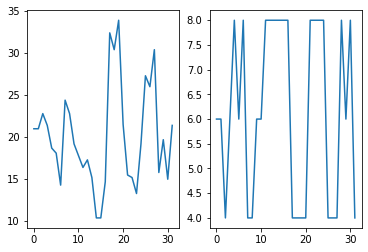

In [23]:
fig = plt.figure()
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(cars['mpg'])
ax2.plot(cars['cyl'])
plt.show()